In [350]:
# cálculos
import numpy as np
import pandas as pd

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

from numpy import random
random.seed(42)

In [351]:
# gestión de datos
import numpy as np
import pandas as pd

# # fechas
# import datetime as dt
# from datetime import datetime
# from dateutil.relativedelta import relativedelta

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# modelos
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier: el equivalente del Adaline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# interpretabilidad
import shap

# para visualizar mas columnas en un df
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

np.random.seed(42)

In [352]:
df_entrenar=pd.read_csv('nivel_educativo_entrenar.csv')
df_predecir=pd.read_csv('nivel_educativo_predecir.csv')


In [353]:
df_entrenar

,Unnamed: 0,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,764,female,1,standard,none,62,76,67
1,866,male,4,standard,none,79,57,58
2,208,female,2,standard,none,77,86,84
3,337,female,0,free/reduced,none,45,46,49
4,323,male,3,standard,completed,82,83,85
...,...,...,...,...,...,...,...,...
795,272,male,0,standard,completed,74,71,65
796,853,male,2,standard,completed,72,72,72
797,894,male,3,standard,none,86,77,78
798,179,male,0,standard,completed,89,87,86


In [354]:
df_predecir

,Unnamed: 0,gender,lunch,test preparation course,math score,reading score,writing score
0,79,male,standard,none,54,43,45
1,277,female,standard,none,72,77,77
2,855,female,standard,none,87,97,100
3,922,male,standard,none,55,55,55
4,332,male,standard,none,56,54,43
...,...,...,...,...,...,...,...
195,299,male,standard,none,47,43,39
196,675,male,standard,none,75,69,65
197,117,male,standard,completed,59,57,55
198,715,male,standard,none,73,66,59


In [355]:
df_entrenar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   800 non-null    int64 
 1   gender                       800 non-null    object
 2   parental level of education  800 non-null    int64 
 3   lunch                        800 non-null    object
 4   test preparation course      800 non-null    object
 5   math score                   800 non-null    int64 
 6   reading score                800 non-null    int64 
 7   writing score                800 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 50.1+ KB


In [356]:
## Eliminacion de duplicados
df_entrenar.drop_duplicates(inplace=True)

In [357]:
del(df_entrenar['Unnamed: 0'])
del(df_predecir['Unnamed: 0'])

In [358]:
columns = [col for col in df_entrenar.columns if col != 'parental level of education'] + ['parental level of education']
df_entrenar = df_entrenar[columns]

In [359]:
df_entrenar

,gender,lunch,test preparation course,math score,reading score,writing score,parental level of education
0,female,standard,none,62,76,67,1
1,male,standard,none,79,57,58,4
2,female,standard,none,77,86,84,2
3,female,free/reduced,none,45,46,49,0
4,male,standard,completed,82,83,85,3
...,...,...,...,...,...,...,...
795,male,standard,completed,74,71,65,0
796,male,standard,completed,72,72,72,2
797,male,standard,none,86,77,78,3
798,male,standard,completed,89,87,86,0


In [360]:
df_predecir

,gender,lunch,test preparation course,math score,reading score,writing score
0,male,standard,none,54,43,45
1,female,standard,none,72,77,77
2,female,standard,none,87,97,100
3,male,standard,none,55,55,55
4,male,standard,none,56,54,43
...,...,...,...,...,...,...
195,male,standard,none,47,43,39
196,male,standard,none,75,69,65
197,male,standard,completed,59,57,55
198,male,standard,none,73,66,59


## Gestion Nulos

In [361]:
df_entrenar.isnull().sum()

gender                         0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
parental level of education    0
dtype: int64

### Variable Objetivo

In [362]:
target='parental level of education'

## Variables Categoricas

In [363]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if i!=target:
            if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2:
                lista_numericas.append(i)
            elif  ((dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2) or dataset[i].dtype.kind=="b":
                lista_boolean.append(i)
            elif  (dataset[i].dtype.kind=="O" or dataset[i].dtype.kind=="M"):
                lista_categoricas.append(i)
        else:
            pass

    return lista_numericas, lista_boolean, lista_categoricas

In [364]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_entrenar)

In [365]:
lista_numericas

['math score', 'reading score', 'writing score']

In [366]:
lista_boolean

[]

In [367]:
lista_categoricas

['gender', 'lunch', 'test preparation course']

In [368]:
df_entrenar['gender'].value_counts()

gender
male      417
female    383
Name: count, dtype: int64

In [369]:
df_entrenar['lunch'].value_counts()

lunch
standard        509
free/reduced    291
Name: count, dtype: int64

In [370]:
df_entrenar['test preparation course'].value_counts()

test preparation course
none         525
completed    275
Name: count, dtype: int64

In [371]:
df_entrenar=pd.get_dummies(df_entrenar)
df_predecir=pd.get_dummies(df_predecir)

In [372]:
df_entrenar

,math score,reading score,writing score,parental level of education,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,62,76,67,1,True,False,False,True,False,True
1,79,57,58,4,False,True,False,True,False,True
2,77,86,84,2,True,False,False,True,False,True
3,45,46,49,0,True,False,True,False,False,True
4,82,83,85,3,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
795,74,71,65,0,False,True,False,True,True,False
796,72,72,72,2,False,True,False,True,True,False
797,86,77,78,3,False,True,False,True,False,True
798,89,87,86,0,False,True,False,True,True,False


In [373]:
df_predecir

,math score,reading score,writing score,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,54,43,45,False,True,False,True,False,True
1,72,77,77,True,False,False,True,False,True
2,87,97,100,True,False,False,True,False,True
3,55,55,55,False,True,False,True,False,True
4,56,54,43,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...
195,47,43,39,False,True,False,True,False,True
196,75,69,65,False,True,False,True,False,True
197,59,57,55,False,True,False,True,True,False
198,73,66,59,False,True,False,True,False,True


## Analisis Correlacion

### Analisis variable a Variable

In [374]:
df_entrenar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   math score                         800 non-null    int64
 1   reading score                      800 non-null    int64
 2   writing score                      800 non-null    int64
 3   parental level of education        800 non-null    int64
 4   gender_female                      800 non-null    bool 
 5   gender_male                        800 non-null    bool 
 6   lunch_free/reduced                 800 non-null    bool 
 7   lunch_standard                     800 non-null    bool 
 8   test preparation course_completed  800 non-null    bool 
 9   test preparation course_none       800 non-null    bool 
dtypes: bool(6), int64(4)
memory usage: 29.8 KB


<Axes: xlabel='parental level of education', ylabel='math score'>

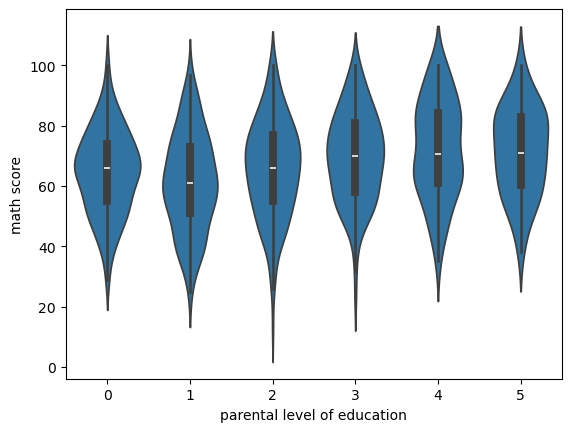

In [375]:
sns.violinplot(data=df_entrenar,y='math score',x=target)

<Axes: xlabel='parental level of education', ylabel='writing score'>

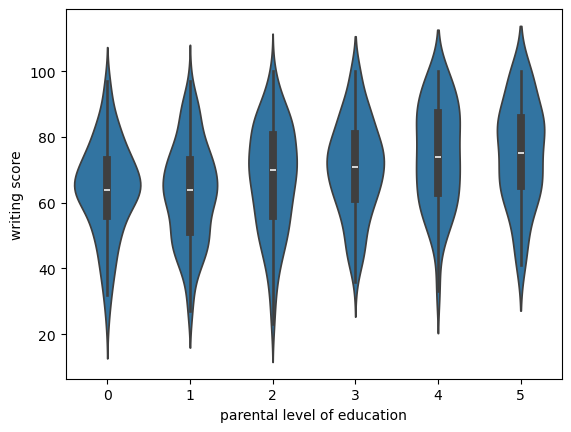

In [376]:
sns.violinplot(data=df_entrenar,y='writing score',x=target)

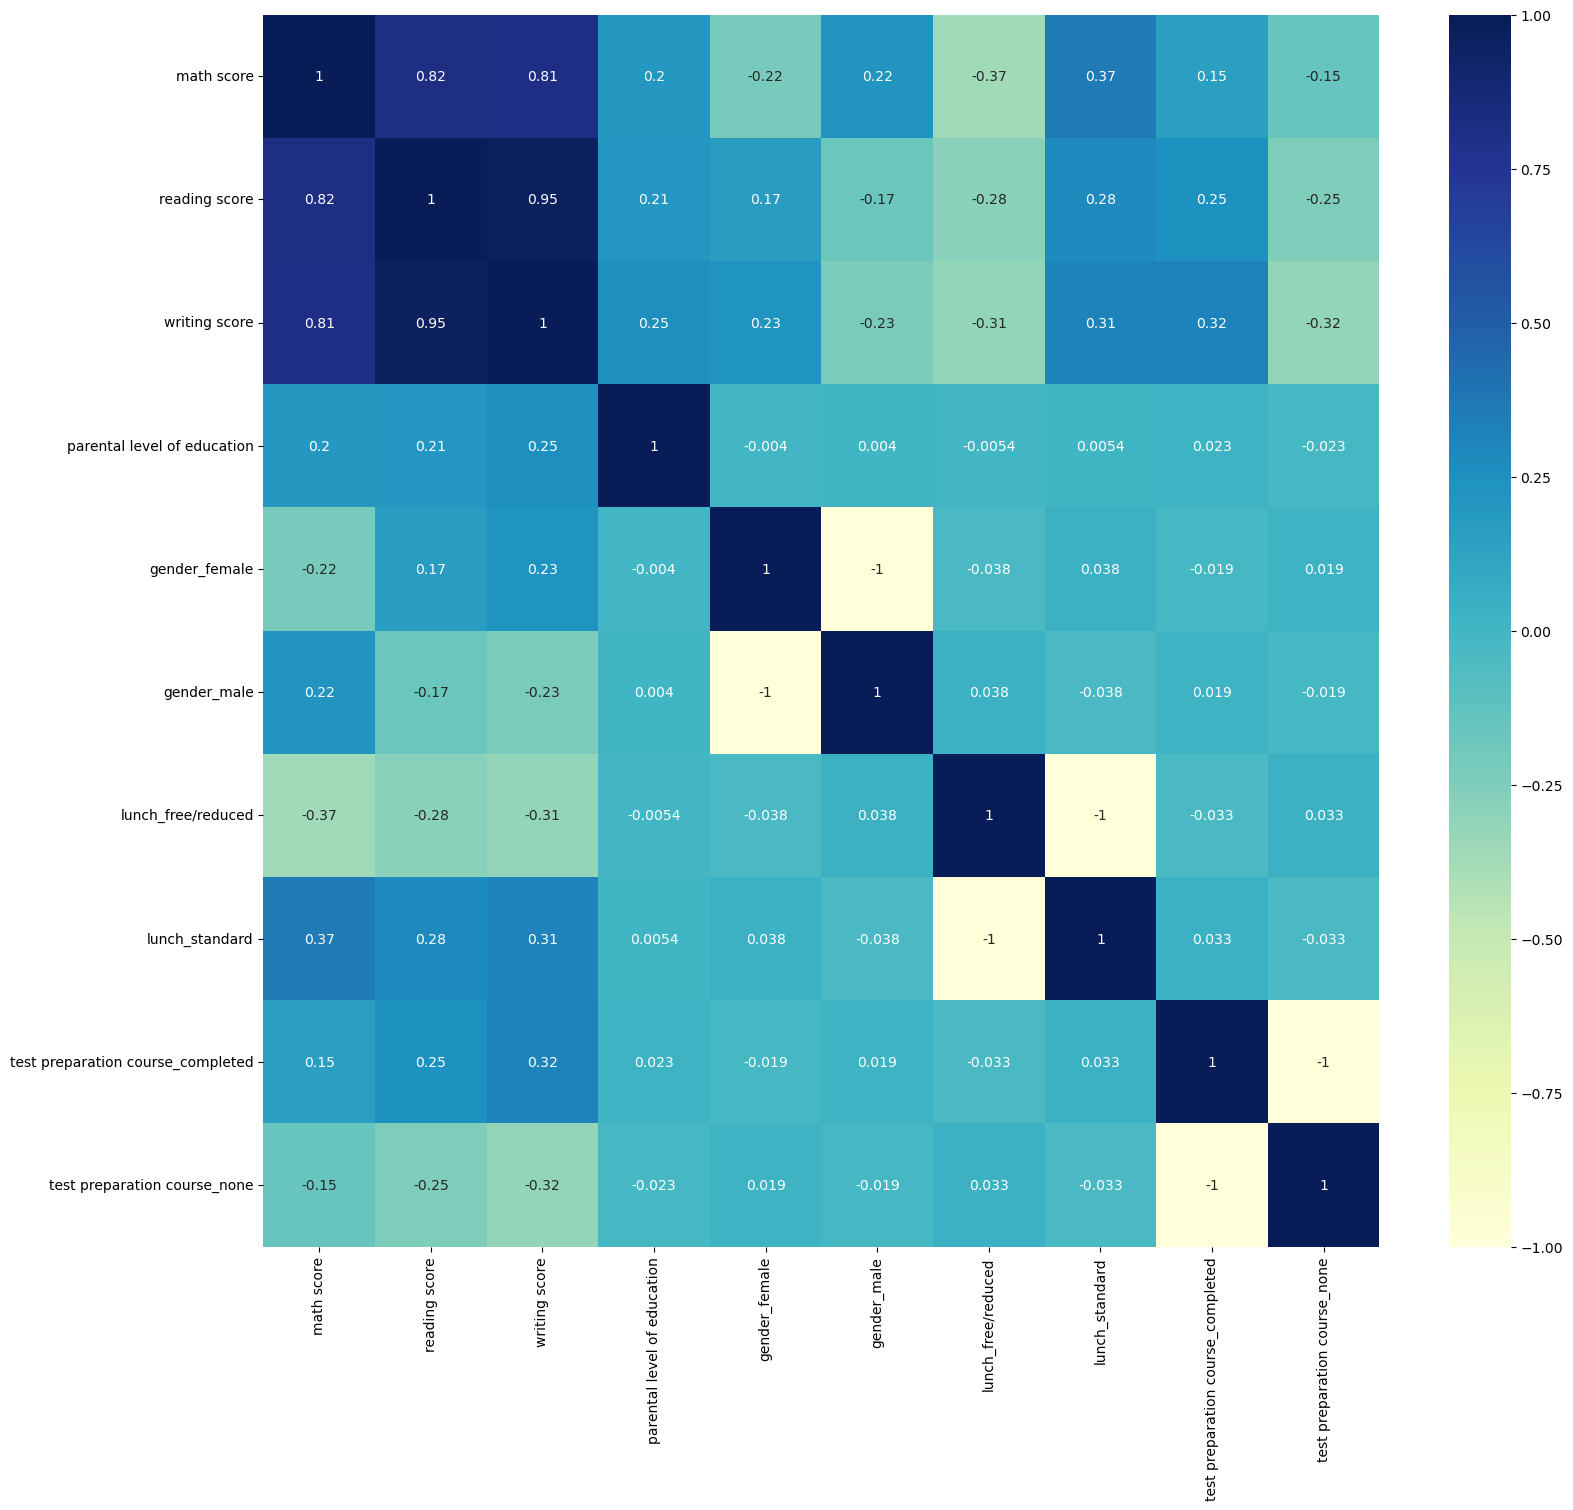

In [377]:
df_corr = df_entrenar.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(data=df_corr, annot=True, cmap='YlGnBu')
plt.show()

In [378]:
Corr_Altas = []

for i in df_corr.index:
    for j in df_corr.columns:
        if i != j and (df_corr.loc[i, j] > 0.9 or df_corr.loc[i, j] < -0.9) and (j, i) not in [(row['Variable_2'], row['Variable_1']) for row in Corr_Altas]:
            Corr_Altas.append({'Variable_1': i, 'Variable_2': j, 'Correlación': df_corr.loc[i, j]})
df_corr_altas = pd.DataFrame(Corr_Altas)

In [379]:
df_corr_altas

,Variable_1,Variable_2,Correlación
0,reading score,writing score,0.95398
1,writing score,reading score,0.95398
2,gender_female,gender_male,-1.00000
3,gender_male,gender_female,-1.00000
4,lunch_free/reduced,lunch_standard,-1.00000
5,lunch_standard,lunch_free/reduced,-1.00000
6,test preparation course_completed,test preparation course_none,-1.00000
7,test preparation course_none,test preparation course_completed,-1.00000


In [380]:
corr_con_target = df_entrenar.corr()[target]

In [381]:
df_corr_altas['corr_var1_target'] = df_corr_altas['Variable_1'].apply(lambda x: corr_con_target[x])
df_corr_altas['corr_var2_target'] = df_corr_altas['Variable_2'].apply(lambda x: corr_con_target[x])
df_corr_altas

,Variable_1,Variable_2,Correlación,corr_var1_target,corr_var2_target
0,reading score,writing score,0.95398,0.208791,0.252136
1,writing score,reading score,0.95398,0.252136,0.208791
2,gender_female,gender_male,-1.00000,-0.003961,0.003961
3,gender_male,gender_female,-1.00000,0.003961,-0.003961
4,lunch_free/reduced,lunch_standard,-1.00000,-0.005446,0.005446
5,lunch_standard,lunch_free/reduced,-1.00000,0.005446,-0.005446
6,test preparation course_completed,test preparation course_none,-1.00000,0.023166,-0.023166
7,test preparation course_none,test preparation course_completed,-1.00000,-0.023166,0.023166


In [382]:
df_corr_altas['var_menos_corr'] = df_corr_altas.apply(
    lambda linea: linea['Variable_1'] if np.abs(linea['corr_var1_target']) < np.abs(linea['corr_var2_target']) else linea['Variable_2'], axis=1)
df_corr_altas

,Variable_1,Variable_2,Correlación,corr_var1_target,corr_var2_target,var_menos_corr
0,reading score,writing score,0.95398,0.208791,0.252136,reading score
1,writing score,reading score,0.95398,0.252136,0.208791,reading score
2,gender_female,gender_male,-1.00000,-0.003961,0.003961,gender_male
3,gender_male,gender_female,-1.00000,0.003961,-0.003961,gender_female
4,lunch_free/reduced,lunch_standard,-1.00000,-0.005446,0.005446,lunch_standard
5,lunch_standard,lunch_free/reduced,-1.00000,0.005446,-0.005446,lunch_standard
6,test preparation course_completed,test preparation course_none,-1.00000,0.023166,-0.023166,test preparation course_none
7,test preparation course_none,test preparation course_completed,-1.00000,-0.023166,0.023166,test preparation course_none


In [383]:
del(df_entrenar['reading score'])
del(df_entrenar['gender_male'])
del(df_entrenar['lunch_standard'])
del(df_entrenar['test preparation course_none'])

del(df_predecir['reading score'])
del(df_predecir['gender_male'])
del(df_predecir['lunch_standard'])
del(df_predecir['test preparation course_none'])

### Varianza

In [384]:
var_poca_varianza = []
print('baja varianza:')

for col in df_entrenar.columns:
  if df_entrenar[col].var() < 0.01:
    print(col, df[col].var())
    var_poca_varianza.append(col)
print('eliminar', var_poca_varianza)

baja varianza:
eliminar []


In [385]:
# Modelado

### Importancia Variables

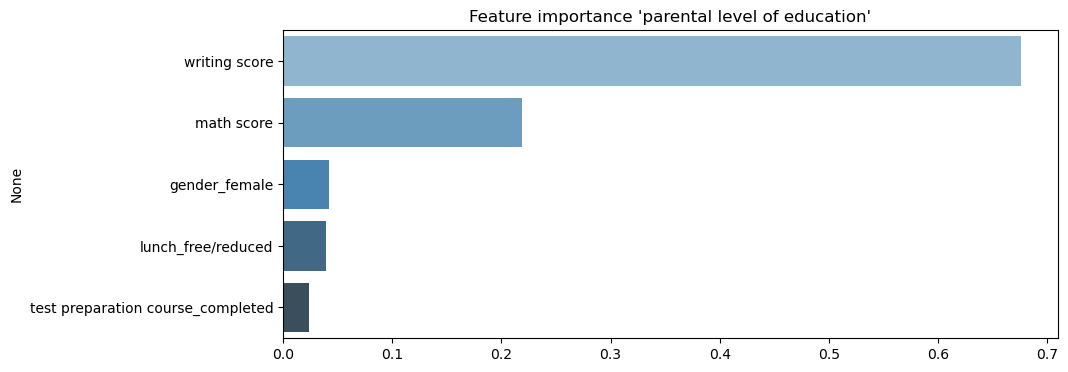

In [386]:
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}

x, y = df_entrenar.drop(target,axis=1), df_entrenar[target]
# entrena un RandomForest Classifier
clf = RandomForestRegressor(**params)
clf = clf.fit(x, y)
# Plotea las 10 mejores Features importances
features = clf.feature_importances_
columnas = x.columns
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)[:10]
plt.figure(figsize=(10,4))
plt.title("Feature importance '{}'".format(target))
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()

### Rebalanceo

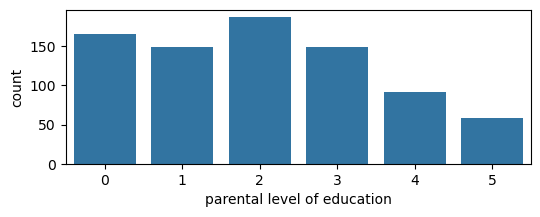

In [387]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=df_entrenar, x=target)
plt.show()

### Separacion Traint/Test

In [388]:
y=df_entrenar[target]
x=df_entrenar.drop(target,axis=1)

In [389]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Estandarización

In [390]:
variables_entrenadas = x.columns

In [391]:
scaler=StandardScaler()

In [392]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_predecir=scaler.transform(df_predecir)

## Competicion de modelos por clasificacion

In [393]:
modelos = []
modelos.append(('SVC', SVC()))
modelos.append(('LogisticRegression', LogisticRegression()))
modelos.append(('RidgeClassifier', RidgeClassifier()))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('XGBClassifier', XGBClassifier()))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False)))

In [394]:
f1s = pd.DataFrame(columns=['modelo', 'f1_score'])
f1s

,modelo,f1_score


In [395]:
for nombre, modelo in modelos:
  # entrenamiento
  modelo.fit(x_train, y_train)

  # predicción del test
  y_pred = modelo.predict(x_test)

  # evalua la metrica
  f1_score = metrics.f1_score(y_test, y_pred, average='macro')

  # añade la métrica al dataframe de métricas
  metrica = pd.DataFrame({'modelo':[nombre], 'f1_score':[f1_score]})

  print(nombre, np.round(f1_score,5))

  f1s = pd.concat([f1s,metrica], ignore_index=True)

SVC 0.16353
LogisticRegression 0.20686
RidgeClassifier 0.1965
DecisionTreeClassifier 0.20987
RandomForestClassifier 0.20538
GradientBoostingClassifier 0.15056
XGBClassifier 0.2275
CatBoostClassifier 0.19001


In [396]:
f1s.sort_values('f1_score', ascending= False)

,modelo,f1_score
6,XGBClassifier,0.227501
3,DecisionTreeClassifier,0.209872
1,LogisticRegression,0.206864
4,RandomForestClassifier,0.205379
2,RidgeClassifier,0.196502
7,CatBoostClassifier,0.190005
0,SVC,0.163532
5,GradientBoostingClassifier,0.150562


## Competicion de modelos por regresion

In [397]:

modelos = []
modelos.append(('LinearRegression', LinearRegression()))
modelos.append(('Lasso', Lasso()))
modelos.append(('Ridge', Ridge()))
modelos.append(('ElasticNet', ElasticNet()))
modelos.append(('SGDRegressor', SGDRegressor()))
modelos.append(('SVR', SVR()))
modelos.append(('RandomForestRegressor', RandomForestRegressor()))
modelos.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
modelos.append(('XGBRegressor', XGBRegressor()))
modelos.append(('CatBoostRegressor', CatBoostRegressor(verbose=False)))

In [398]:
for nombre, modelo in modelos:
  # entrenamiento
  modelo.fit(x_train, y_train)

  # predicción del test
  y_pred = modelo.predict(x_test)

  # pasamos las predicciones dataframe
  df_pred = pd.DataFrame(y_pred, columns=['prediccion'])

  # redeondeamos las predicciones
  df_pred['prediccion'] = round(df_pred['prediccion'], 0)

  # cambiamos los valores extremos
  df_pred['prediccion'] = df_pred['prediccion'].apply(lambda x: 0 if x < 0
                                                                else (5 if x > 5
                                                                      else int(x)))

  # evalua la metrica
  f1_score = metrics.f1_score(y_test, df_pred['prediccion'], average='macro')

  # añade la métrica al dataframe de métricas
  metrica = pd.DataFrame({'modelo':[nombre], 'f1_score':[f1_score]})

  print(nombre, np.round(f1_score,5))

  f1s = pd.concat([f1s,metrica], ignore_index=True)

LinearRegression 0.14316
Lasso 0.07692
Ridge 0.14316
ElasticNet 0.07692
SGDRegressor 0.14779
SVR 0.1251
RandomForestRegressor 0.15744
GradientBoostingRegressor 0.16222
XGBRegressor 0.16555
CatBoostRegressor 0.16115


In [399]:
f1s.sort_values('f1_score', ascending= False)

,modelo,f1_score
6,XGBClassifier,0.227501
3,DecisionTreeClassifier,0.209872
1,LogisticRegression,0.206864
4,RandomForestClassifier,0.205379
2,RidgeClassifier,0.196502
7,CatBoostClassifier,0.190005
16,XGBRegressor,0.165553
0,SVC,0.163532
15,GradientBoostingRegressor,0.162216
17,CatBoostRegressor,0.161150


## Prediccion

In [400]:
# definimos el modelo
modelo = XGBClassifier()

# entrenamiento
modelo.fit(x_train, y_train)

# predicción de las observaciones a predecir
y_pred = modelo.predict(x_predecir)

# añadimos la predicción al dataframe a predecir
df_predecir['prediccion'] = y_pred

# redeondeamos las predicciones
df_predecir['prediccion'] = round(df_predecir['prediccion'], 0)

# cambiamos los valores extremos
df_predecir['prediccion'] = df_predecir['prediccion'].apply(lambda x: 0 if x < 0
                                                                      else (5 if x > 5
                                                                            else int(x)))

In [401]:
df_predecir

,math score,writing score,gender_female,lunch_free/reduced,test preparation course_completed,prediccion
0,54,45,False,False,False,3
1,72,77,True,False,False,0
2,87,100,True,False,False,4
3,55,55,False,False,False,3
4,56,43,False,False,False,2
...,...,...,...,...,...,...
195,47,39,False,False,False,0
196,75,65,False,False,False,0
197,59,55,False,False,True,3
198,73,59,False,False,False,0
